In [1]:
# Célula 1: Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Configurações de estilo
plt.style.use("ggplot")
sns.set_palette("Set2")

In [2]:
# Célula 2: Carregar dataset
df = pd.read_csv("datasets/creditcard.csv")

# Info básica
print("Dimensões:", df.shape)
print("\nTipos de dados:\n", df.dtypes.value_counts())
print("\nValores nulos:", df.isnull().sum().sum())
df.head()

Dimensões: (284807, 31)

Tipos de dados:
 float64    30
int64       1
Name: count, dtype: int64

Valores nulos: 0


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


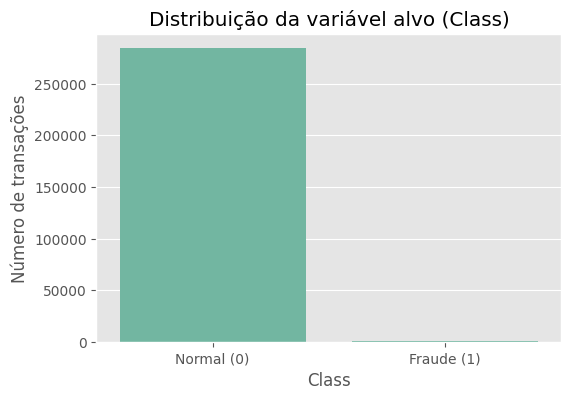

Proporção de fraudes: 0.1727%


In [3]:
# Célula 3: Distribuição da variável alvo (fraude vs normal)
class_counts = df["Class"].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title("Distribuição da variável alvo (Class)")
plt.xticks([0,1], ["Normal (0)", "Fraude (1)"])
plt.ylabel("Número de transações")
plt.show()

print("Proporção de fraudes: {:.4f}%".format(class_counts[1] / class_counts.sum() * 100))

In [4]:
# Célula 4: Estatísticas das variáveis numéricas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.175161e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.384974e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.094852e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,1.021879e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.494498e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.620335e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.149614e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.414189e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


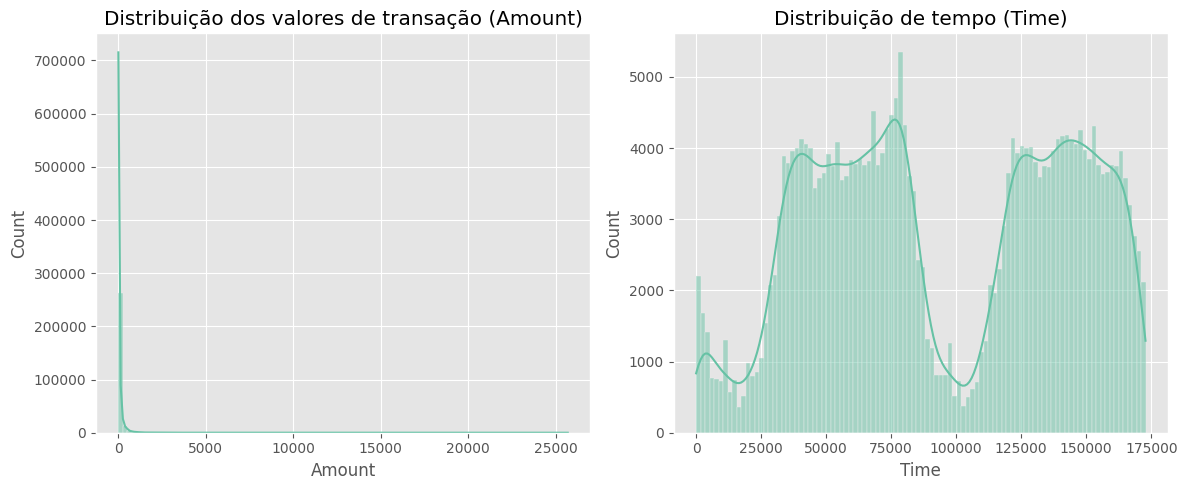

In [5]:
# Célula 5: Distribuição de 'Amount' e 'Time'
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df["Amount"], bins=100, kde=True)
plt.title("Distribuição dos valores de transação (Amount)")

plt.subplot(1,2,2)
sns.histplot(df["Time"], bins=100, kde=True)
plt.title("Distribuição de tempo (Time)")

plt.tight_layout()
plt.show()

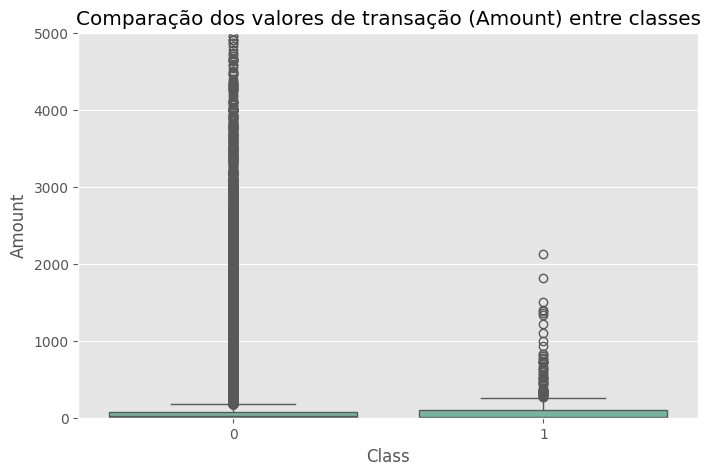

In [6]:
# Célula 6: Boxplots de 'Amount' para fraude vs normal
plt.figure(figsize=(8,5))
sns.boxplot(x="Class", y="Amount", data=df)
plt.ylim(0, 5000)  # limitar para visualizar melhor
plt.title("Comparação dos valores de transação (Amount) entre classes")
plt.show()

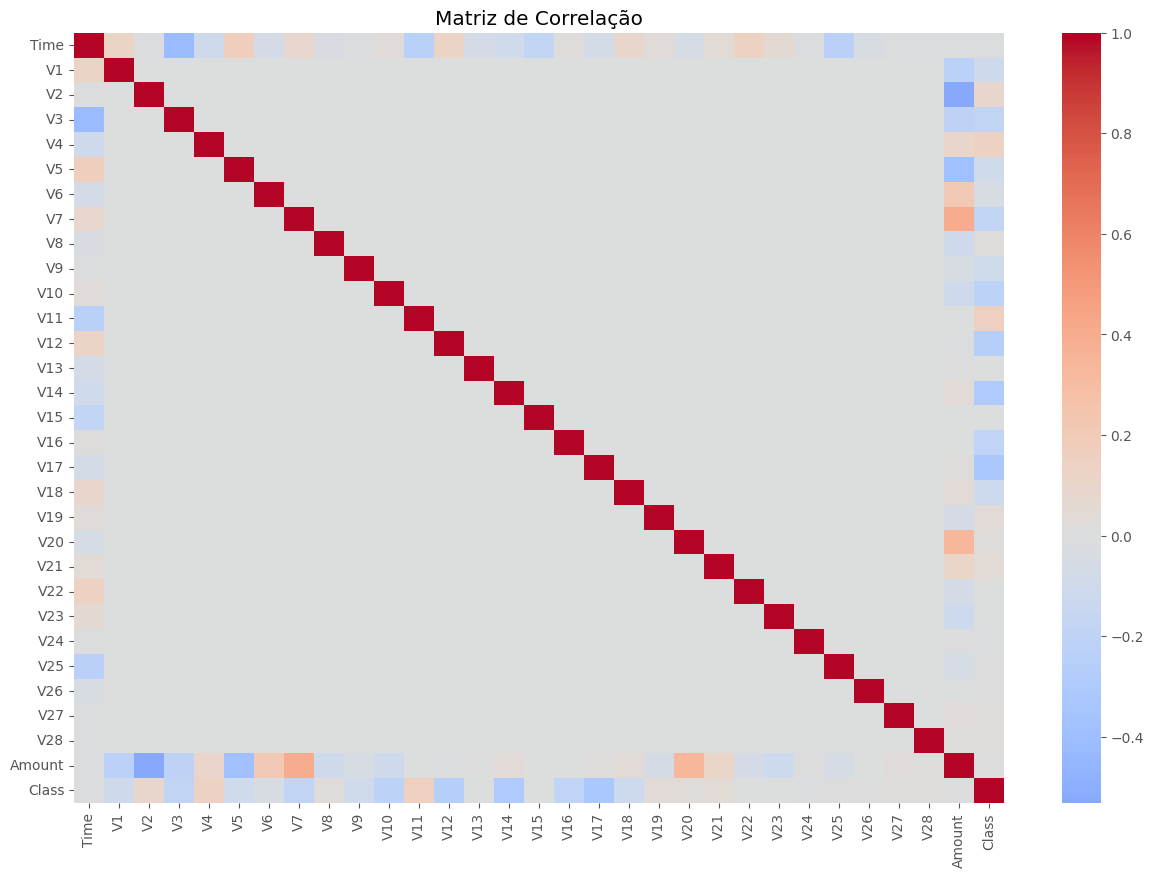

In [7]:
# Célula 7: Correlação entre variáveis
plt.figure(figsize=(15,10))
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", center=0, cbar=True)
plt.title("Matriz de Correlação")
plt.show()

In [8]:
# Célula 8: Correlação das features com a variável alvo
corr_class = corr["Class"].sort_values(ascending=False)
print("Correlação das variáveis com a Class:\n")
print(corr_class)

Correlação das variáveis com a Class:

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


In [9]:
# Célula 3: Criando novas features a partir de 'Time'
df["hour"] = (df["Time"] // 3600) % 24
df["day"] = df["Time"] // (3600*24)
df["period"] = pd.cut(df["hour"], bins=[0,6,12,18,24], 
                      labels=["Madrugada","Manhã","Tarde","Noite"], right=False)

# Encoding para 'period'
le = LabelEncoder()
df["period_enc"] = le.fit_transform(df["period"])

df[["Time","hour","day","period","period_enc"]].head(10)

,Time,hour,day,period,period_enc
0,0.0,0.0,0.0,Madrugada,0
1,0.0,0.0,0.0,Madrugada,0
2,1.0,0.0,0.0,Madrugada,0
3,1.0,0.0,0.0,Madrugada,0
4,2.0,0.0,0.0,Madrugada,0
5,2.0,0.0,0.0,Madrugada,0
6,4.0,0.0,0.0,Madrugada,0
7,7.0,0.0,0.0,Madrugada,0
8,7.0,0.0,0.0,Madrugada,0
9,9.0,0.0,0.0,Madrugada,0


In [10]:
# Célula 4: Criando novas features a partir de 'Amount'
df["log_amount"] = np.log1p(df["Amount"])
df["amount_bin"] = pd.qcut(df["Amount"], q=4, labels=["baixo","medio_baixo","medio_alto","alto"])

# Encoding para 'amount_bin'
df["amount_bin_enc"] = le.fit_transform(df["amount_bin"])

df[["Amount","log_amount","amount_bin","amount_bin_enc"]].head(10)

,Amount,log_amount,amount_bin,amount_bin_enc
0,149.62,5.014760,alto,0
1,2.69,1.305626,baixo,1
2,378.66,5.939276,alto,0
3,123.50,4.824306,alto,0
4,69.99,4.262539,medio_alto,2
5,3.67,1.541159,baixo,1
6,4.99,1.790091,baixo,1
7,40.80,3.732896,medio_alto,2
8,93.20,4.545420,alto,0
9,3.68,1.543298,baixo,1


Correlação das variáveis com a classe:

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
Name: Class, dtype: float64


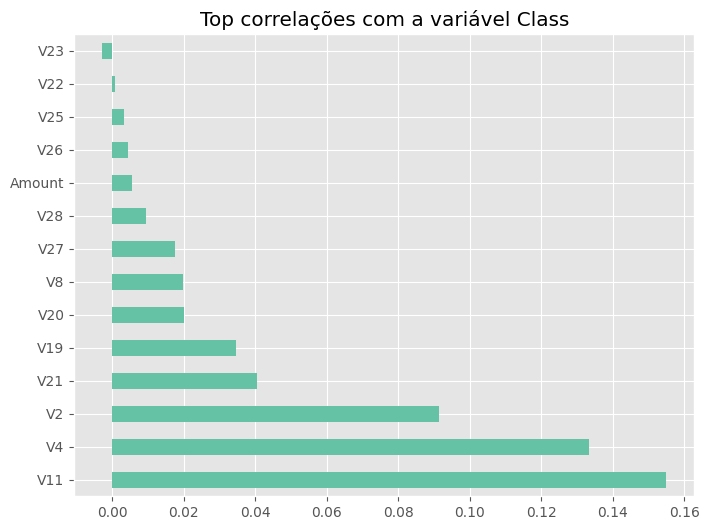

In [11]:
# Célula 5: Correlação com a variável alvo
corr = df.drop(['period', 'amount_bin'], axis=1).corr()["Class"].sort_values(ascending=False)
print("Correlação das variáveis com a classe:\n")
print(corr.head(15))

plt.figure(figsize=(8,6))
corr.head(15).drop("Class").plot(kind="barh")
plt.title("Top correlações com a variável Class")
plt.show()